In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as LA
from numpy import linalg as LA
import math

## FUNCTION

In [2]:
def log_reg(X,y, beta,step_size): #X is the data point, y is the 0s and 1s, initial betas, step_size
    
    count = 0
    gradient = 1
    betas = beta
    lst = []
    
    while(LA.norm(gradient) > step_size):
        #calculating gradient
        df = y - 1 #yi - 1, 112x1
        X_dot_beta = X.dot(betas) #e-x.B 112 x 3, 3 x 1 -> 112x1
        X_dot_beta_negative = np.negative(X_dot_beta)#-X.B

        numerator = np.exp(X_dot_beta_negative)
        denominator = numerator + 1 #denominator
        fraction = numerator/denominator #numerator/denominator 112x1
        df1 = df['Dementia'].add(fraction[0])
        gradient = df1.dot(X).to_frame() #X is 112x3, df1 is 112x1 -> why does this work?
        
        #calculating log-likelihood
        ln_denom = np.log(denominator)
        log_likelihood = (df['Dementia'] * (X_dot_beta[0])).to_frame() # is it ok to do regular multiplication
        log_likelihood = (log_likelihood[0] - ln_denom[0]).to_frame()
        log_likelihood = log_likelihood[0].sum()
        lst.append(log_likelihood)
        
        #updating beta
        betas = (gradient[0]*step_size) + betas[0] #3x1 + 3x1 -> 3x1
        betas = betas.to_frame()
        
        count += 1
        
        if(count == 100):
            break
        
    log_like_lst = pd.DataFrame (lst, columns = ['log_likelihood'])
    log_like_lst.plot(y= 'log_likelihood')
    print('This is the gradient')
    print(gradient)
    print(beta)
    return betas

## 1a

In [3]:
hippo = pd.read_csv("OASIS-hippocampus.csv")
hippo

,Unnamed: 0,ID,M.F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,RightHippoVol,LeftHippoVol,TrainData,Dementia
0,1,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,4230,3807,0,0
1,2,OAS1_0003_MR1,F,R,73,4,3.0,27,0.5,1454,0.708,1.207,NaN,2896,2801,1,1
2,7,OAS1_0010_MR1,M,R,74,5,2.0,30,0.0,1636,0.689,1.073,NaN,2832,2578,0,0
3,8,OAS1_0011_MR1,F,R,52,3,2.0,30,0.0,1321,0.827,1.329,NaN,3978,4080,0,0
4,10,OAS1_0013_MR1,F,R,81,5,2.0,30,0.0,1664,0.679,1.055,NaN,3557,3495,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,399,OAS1_0453_MR1,F,R,70,1,4.0,29,0.5,1295,0.748,1.355,NaN,4037,3852,0,1
221,400,OAS1_0454_MR1,F,R,73,3,2.0,23,0.5,1536,0.730,1.142,NaN,3545,3337,0,1
222,401,OAS1_0455_MR1,F,R,61,2,4.0,28,0.0,1354,0.825,1.297,NaN,4427,4439,0,0
223,402,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,4616,3978,0,0


In [4]:
HippoTraining = hippo[hippo['TrainData'] == 1]

In [5]:
HippoTraining = HippoTraining[['RightHippoVol', 'LeftHippoVol','Dementia']]

In [6]:
HippoTraining = (HippoTraining-HippoTraining.min())/(HippoTraining.max()-HippoTraining.min())
dementia = HippoTraining['Dementia'].to_frame()
dementia.reset_index(inplace=True, drop = True)
HippoTraining['intercept'] = HippoTraining.apply(lambda x: 1, axis=1)
columns_titles = ["intercept","LeftHippoVol","RightHippoVol","Dementia"]
HippoTraining=HippoTraining.reindex(columns=columns_titles)
HippoTraining  = HippoTraining.drop('Dementia', axis=1)
HippoTraining.reset_index(inplace=True, drop = True)

HippoTraining

,intercept,LeftHippoVol,RightHippoVol
0,1,0.312556,0.288790
1,1,0.303266,0.338189
2,1,0.122565,0.139645
3,1,0.353311,0.566498
4,1,0.794426,0.866688
...,...,...,...
107,1,0.663171,0.663078
108,1,0.283188,0.492084
109,1,0.499251,0.370488
110,1,0.380881,0.466118


In [7]:
dementia['Dementia'].dot(HippoTraining)

intercept        46.000000
LeftHippoVol     16.569374
RightHippoVol    17.372704
Name: Dementia, dtype: float64

In [8]:
HippoTraining

,intercept,LeftHippoVol,RightHippoVol
0,1,0.312556,0.288790
1,1,0.303266,0.338189
2,1,0.122565,0.139645
3,1,0.353311,0.566498
4,1,0.794426,0.866688
...,...,...,...
107,1,0.663171,0.663078
108,1,0.283188,0.492084
109,1,0.499251,0.370488
110,1,0.380881,0.466118


In [9]:
dementia

,Dementia
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
107,0.0
108,0.0
109,0.0
110,1.0


In [10]:
#betas = pd.DataFrame(np.random.randint(10,size=(3, 1))) ##use smaller number 10-3, 10-4, can also use beta = 0
betas = pd.DataFrame(np.zeros((3, 1)))
# use rando mas a possiblity, then use zeros, random seed
betas.rename(index={0: 'intercept',1:'LeftHippoVol',2:'RightHippoVol'},inplace= True)
betas #initialize with random gaussians -> np.random

,0
intercept,0.0
LeftHippoVol,0.0
RightHippoVol,0.0


## 1b & 1c

This is the gradient
                      0
intercept      0.090602
LeftHippoVol  -0.111974
RightHippoVol -0.081880
                 0
intercept      0.0
LeftHippoVol   0.0
RightHippoVol  0.0
                      0
intercept      3.385666
LeftHippoVol  -3.934121
RightHippoVol -3.981924


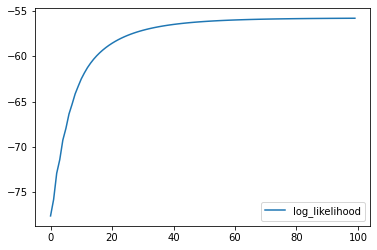

In [11]:
logistic_regression = log_reg(HippoTraining,dementia,betas,0.05)
print(logistic_regression)

## 1d

<AxesSubplot:xlabel='LeftHippoVol', ylabel='RightHippoVol'>

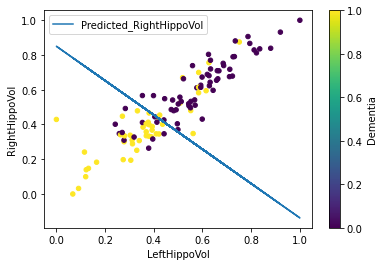

In [12]:
HippoTraining = hippo[hippo['TrainData'] == 1]
HippoTraining = HippoTraining[['RightHippoVol', 'LeftHippoVol','Dementia']]
HippoTraining = (HippoTraining-HippoTraining.min())/(HippoTraining.max()-HippoTraining.min())
HippoTraining['intercept'] = HippoTraining.apply(lambda x: 1, axis=1)
columns_titles = ["intercept","LeftHippoVol","RightHippoVol","Dementia"]
HippoTraining=HippoTraining.reindex(columns=columns_titles)
HippoTraining.reset_index(inplace=True, drop = True)

# β0+β1x1+β2x2=0 -> B2x2 = -b0 - b1x1 -> x2 = (-b0 - b1x1)/b2
b1x1 = (logistic_regression.iloc[1][0] * -1 * HippoTraining['LeftHippoVol']).to_frame()
b0 = -1 * logistic_regression.iloc[0][0]
HippoTraining['Predicted_RightHippoVol'] = (b0 + b1x1)/logistic_regression.iloc[2][0]



fig, ax = plt.subplots()

HippoTraining.plot.scatter(x = 'LeftHippoVol',y = 'RightHippoVol', c='Dementia',  colormap='viridis', ax=ax)
HippoTraining.plot(x='LeftHippoVol', y = 'Predicted_RightHippoVol', ax = ax)

## 1e

In [13]:
#Testing
HippoTest = hippo[hippo['TrainData'] == 0]
HippoTest = HippoTest[['RightHippoVol', 'LeftHippoVol','Dementia']]
HippoTest = (HippoTest-HippoTest.min())/(HippoTest.max()-HippoTest.min())
HippoTest['intercept'] = HippoTest.apply(lambda x: 1, axis=1)
columns_titles = ["intercept","LeftHippoVol","RightHippoVol","Dementia"]
HippoTest=HippoTest.reindex(columns=columns_titles)
HippoTest.reset_index(inplace=True, drop = True)
HippoTest

,intercept,LeftHippoVol,RightHippoVol,Dementia
0,1,0.674723,0.790644,0.0
1,1,0.171241,0.386948,0.0
2,1,0.786563,0.717875,0.0
3,1,0.546907,0.596304,0.0
4,1,0.392872,0.557031,1.0
...,...,...,...,...
108,1,0.630479,0.677447,1.0
109,1,0.693159,0.734912,1.0
110,1,0.482179,0.592839,1.0
111,1,0.933634,0.847531,0.0


In [14]:
HippoTest['Prediction'] = 1 + np.exp((-1 * logistic_regression.iloc[0][0] * HippoTest['intercept']) + 
                                  (-1 * logistic_regression.iloc[1][0] * HippoTest['LeftHippoVol'])+ 
                                  (-1 * logistic_regression.iloc[2][0] * HippoTest['RightHippoVol']))
HippoTest['Prediction'] = 1/HippoTest['Prediction']
HippoTest['Prediction'].head(20)


0     0.081881
1     0.763359
2     0.071274
3     0.242253
4     0.406610
5     0.029596
6     0.300450
7     0.273371
8     0.364732
9     0.286797
10    0.802529
11    0.187749
12    0.405399
13    0.186841
14    0.626820
15    0.266689
16    0.237429
17    0.676459
18    0.373753
19    0.050541
Name: Prediction, dtype: float64

In [15]:
HippoTest['Predicted_Dementia'] = np.where(HippoTest['Prediction'] >= 0.5 ,1, 0)
HippoTest

,intercept,LeftHippoVol,RightHippoVol,Dementia,Prediction,Predicted_Dementia
0,1,0.674723,0.790644,0.0,0.081881,0
1,1,0.171241,0.386948,0.0,0.763359,1
2,1,0.786563,0.717875,0.0,0.071274,0
3,1,0.546907,0.596304,0.0,0.242253,0
4,1,0.392872,0.557031,1.0,0.406610,0
...,...,...,...,...,...,...
108,1,0.630479,0.677447,1.0,0.142796,0
109,1,0.693159,0.734912,1.0,0.093836,0
110,1,0.482179,0.592839,1.0,0.294854,0
111,1,0.933634,0.847531,0.0,0.025034,0


In [16]:
HippoTest['Accuracy'] = np.where(HippoTest['Predicted_Dementia'] != HippoTest['Dementia'] , "Wrong", "Correct")
HippoTest["Accuracy"].value_counts()

Correct    75
Wrong      38
Name: Accuracy, dtype: int64

In [17]:
print(len(HippoTest[HippoTest['Accuracy'] == 'Correct'])/len(HippoTest))

0.6637168141592921


The accuracy is lower than the naive bayes model. The naive bayes model had 72% accuracy

## Question 2 

In [36]:
#Edited Function

def planes_frogs_log_reg(X,y, beta,step_size): #X is the data point, y is the 0s and 1s, initial betas, step_size
    
    count = 0
    gradient = 1
    betas = beta
    lst = []
    
    while(LA.norm(gradient) > step_size):
        #calculating gradient
        df = y.subtract(1) #yi - 1,
        X_dot_beta = X.dot(betas) # x.B 
        X_dot_beta_negative = np.negative(X_dot_beta)#-X.B
        
        numerator = np.exp(X_dot_beta_negative)
        denominator = numerator.add(1) #denominator
        fraction = numerator.div(denominator)#numerator/denominator 112x1

        df1 = df['classification'].add(fraction[0])
        gradient = df1.dot(X).to_frame() #X is 112x3 #divide the number by the datapoints 
        
        #calculating log-likelihood
        ln_denom = np.log(denominator)
        log_likelihood = (df['classification'] * (X_dot_beta[0])).to_frame()
        log_likelihood = (log_likelihood[0] - ln_denom[0]).to_frame()
        log_likelihood = log_likelihood[0].sum()
        lst.append(log_likelihood)
        
        #updating beta
        betas = (gradient[0]*step_size) + betas[0]
        betas = betas.to_frame()
        
        count += 1
        
        if(count == 100):
            break
        
    log_like_lst = pd.DataFrame (lst, columns = ['log_likelihood'])
    log_like_lst.plot(y= 'log_likelihood')
    print("This is the gradient")
    print(gradient)
    return betas

## 2a

In [37]:
import pickle

def readCIFAR(filename):
    with open(filename, mode='rb') as file:
        data = pickle.load(file, encoding='bytes')

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    y = np.array(data[b'labels'])

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw_images, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, 3, 32, 32])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    X = images.reshape((images.shape[0], 3*32*32))
    return X, y

# Example usage: read batch 1 for training
X, y = readCIFAR("data_batch_1")
planes_frogs = pd.DataFrame(X)
planes_frogs = (planes_frogs-planes_frogs.min())/(planes_frogs.max()-planes_frogs.min())
classification = pd.DataFrame(y,columns = ['classification'])

#making the dataset only based on planes and frogs
planes_frogs['classification'] = classification['classification']
planes_frogs = planes_frogs[(planes_frogs['classification'] == 6) | (planes_frogs['classification'] == 0)]
planes_frogs[3072] = planes_frogs.apply(lambda x: 1, axis=1)
planes_frogs  = planes_frogs.drop('classification', axis=1)
planes_frogs.reset_index(drop= True,inplace = True)

classification['classification'] =  classification[(classification['classification'] == 6) | (classification['classification'] == 0)]
classification = classification.replace(to_replace = 6, value = 1)
classification = classification.dropna()
classification.reset_index(drop= True,inplace = True)

#beta
#planes_frogs_betas = pd.DataFrame(np.random.randint(10,size=(planes_frogs.shape[1], 1)))
planes_frogs_betas = pd.DataFrame(np.zeros((planes_frogs.shape[1], 1)))

## 2b & 2c

This is the gradient
               0
0       9.452300
1     -11.262183
2     -65.647201
3      10.519264
4     -10.424283
...          ...
3068    0.530842
3069   45.366497
3070   32.770701
3071    0.574522
3072  109.843056

[3073 rows x 1 columns]


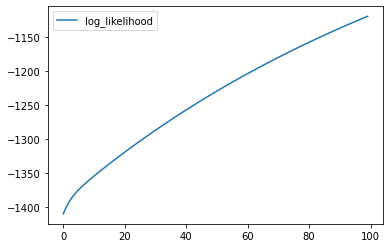

In [38]:
planes_frogs_betas = planes_frogs_log_reg(planes_frogs,classification,planes_frogs_betas,0.000005) #play around with step-size, usally takes more than 100

## 2d

In [ ]:
X1, y1 = readCIFAR("test_batch")
planes_frogs_test = pd.DataFrame(X1)
planes_frogs_test = (planes_frogs_test-planes_frogs_test.min())/(planes_frogs_test.max()-planes_frogs_test.min())
classification_test = pd.DataFrame(y1,columns = ['classification'])

#making the dataset only based on planes and frogs
planes_frogs_test['classification'] = classification_test['classification']
planes_frogs_test = planes_frogs_test[(planes_frogs_test['classification'] == 6) | (planes_frogs_test['classification'] == 0)]
planes_frogs_test[3072] = planes_frogs_test.apply(lambda x: 1, axis=1)
planes_frogs_test  = planes_frogs_test.drop('classification', axis=1)
planes_frogs_test.reset_index(drop= True,inplace = True)

classification_test['classification'] =  classification_test[(classification_test['classification'] == 6) | (classification_test['classification'] == 0)]
classification_test = classification_test.replace(to_replace = 6, value = 1)
classification_test = classification_test.dropna()
classification_test.reset_index(drop= True,inplace = True)

planes_frogs_test['Probability'] = 1/(1 + np.exp(-1 * planes_frogs_test.dot(planes_frogs_betas)))
planes_frogs_test['classification'] = classification_test['classification']
planes_frogs_test['Predicted_Planes'] = np.where(planes_frogs_test['Probability'] >= 0.5 ,1, 0)
planes_frogs_test['Accuracy'] = np.where(planes_frogs_test['classification'] != planes_frogs_test['Predicted_Planes'] , "Wrong", "Correct")
print(len(planes_frogs_test[planes_frogs_test['Accuracy'] == 'Correct'])/len(planes_frogs_test))

The accuracy is 89.75%

## 2e

In [ ]:
frogs = planes_frogs_test[(planes_frogs_test['Accuracy'] == 'Correct') & 
                       (planes_frogs_test['Predicted_Planes'] == 1)].sample(n=10) #frogs
frogs.drop(columns = [3072, 'Probability', 'classification', 'Predicted_Planes','Accuracy'], inplace = True)
froggy = frogs.to_numpy()

planes = planes_frogs_test[(planes_frogs_test['Accuracy'] == 'Correct') & 
                       (planes_frogs_test['Predicted_Planes'] == 0)].sample(n=10) #planes
planes.drop(columns = [3072, 'Probability', 'classification', 'Predicted_Planes','Accuracy'], inplace = True)
planez = planes.to_numpy()

fig, axs = plt.subplots(nrows = 10,ncols = 2, figsize=(25,25)) 
count = 0
count2 = 0
for i in froggy:
    images = np.reshape(i,(32,32,3))
    axs[count,0].imshow(images)
    count +=1
for i in planez:
    images = np.reshape(i,(32,32,3))
    axs[count2,1].imshow(images)
    count2 +=1
plt.show()


In [ ]:
frogs = planes_frogs_test[(planes_frogs_test['Accuracy'] == 'Wrong') & 
                       (planes_frogs_test['Predicted_Planes'] == 1)].sample(n=10) #frogs
frogs.drop(columns = [3072, 'Probability', 'classification', 'Predicted_Planes','Accuracy'], inplace = True)
froggy = frogs.to_numpy()

planes = planes_frogs_test[(planes_frogs_test['Accuracy'] == 'Wrong') & 
                       (planes_frogs_test['Predicted_Planes'] == 0)].sample(n=10) #planes
planes.drop(columns = [3072, 'Probability', 'classification', 'Predicted_Planes','Accuracy'], inplace = True)
planez = planes.to_numpy()

fig, axs = plt.subplots(nrows = 10,ncols = 2, figsize=(25,25)) 
count = 0
count2 = 0
for i in froggy:
    images = np.reshape(i,(32,32,3))
    axs[count,0].imshow(images)
    count +=1
for i in planez:
    images = np.reshape(i,(32,32,3))
    axs[count2,1].imshow(images)
    count2 +=1
plt.show()


The mistakes that the classifier made seemed to be reasonable for some of the samples. Both of the misclassified frogs and planes are colored differently from the rest of the planes. For example, some planes are green and there are some other planes that have objects in the background (which happen to have similar color to frogs). When looking at the frogs, it is a little more difficult to interpret the reasons for why the classifier misclassified the image. Some frog pictures look very similar to the other frog pictures that were classified similarly.